In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycircstat2 import Circular, load_data

# Statistical analysis of circular data (Fisher, 1993)

### Figure 2.1

In [2]:
from pycircstat2.utils import time2float

d_fisher_b1 = np.asarray(load_data("B1", source="fisher")["time"].values)
c_fisher_b1 = Circular(time2float(d_fisher_b1), unit="hour")

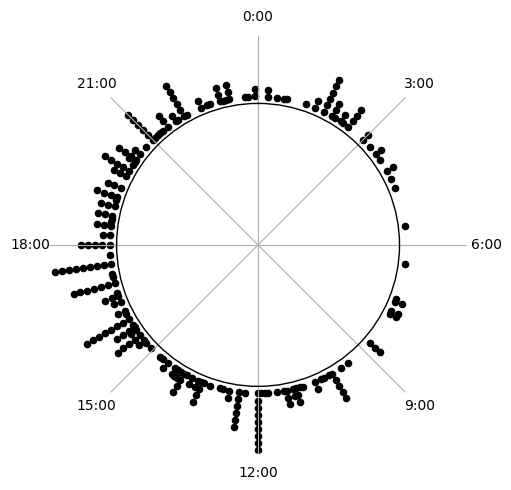

In [3]:
c_fisher_b1.plot(
    config={
        "rose": False,
        "mean": False,
        "median": False,
        "density": False,
        "scatter": {"size": 20},
    }
)

### Figure 2.2

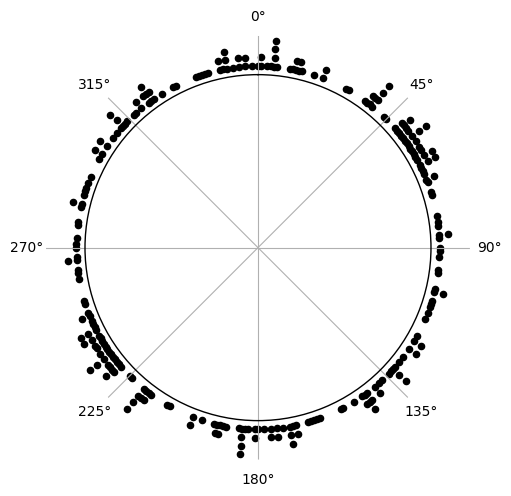

In [4]:
d_fisher_b2 = np.asarray(load_data("B2", source="fisher")["θ"].values)
d_fisher_b2_double = np.hstack([d_fisher_b2, d_fisher_b2 + 180])
# This is an example of an axial data set, which only contains one direction;
# To replicate Fig 2.2, you need to double the data;
c_fisher_b2 = Circular(d_fisher_b2_double, unit="degree")

c_fisher_b2.plot(
    config={
        "rose": False,
        "mean": False,
        "median": False,
        "density": False,
        "scatter": {"size": 20},
    }
)

### Figure 2.9

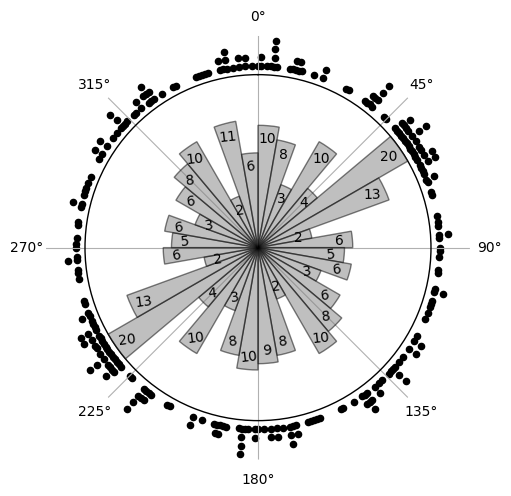

In [5]:
d_fisher_b2 = np.asarray(load_data("B2", source="fisher")["θ"].values)
d_fisher_b2_double = np.hstack([d_fisher_b2, d_fisher_b2 + 180])
# This is an example of an axial data set, which only contains one direction;
# To replicate Fig 2.2, you need to double the data;
c_fisher_b2 = Circular(d_fisher_b2_double, unit="degree")

c_fisher_b2.plot(
    config={
        "rose": {"bins": 36, "counts": True},
        "mean": False,
        "median": False,
        "density": False,
        "scatter": {"size": 20},
    }
)

### Figure 2.14

In [6]:
d_fisher_b1 = np.asarray(load_data("B1", source="fisher")["time"].values)
c_fisher_b1 = Circular(time2float(d_fisher_b1), unit="hour")

In [7]:
from pycircstat2.descriptive import compute_smooth_params

h0 = compute_smooth_params(c_fisher_b1.r, c_fisher_b1.n)
h0

np.float64(1.0587043511866296)

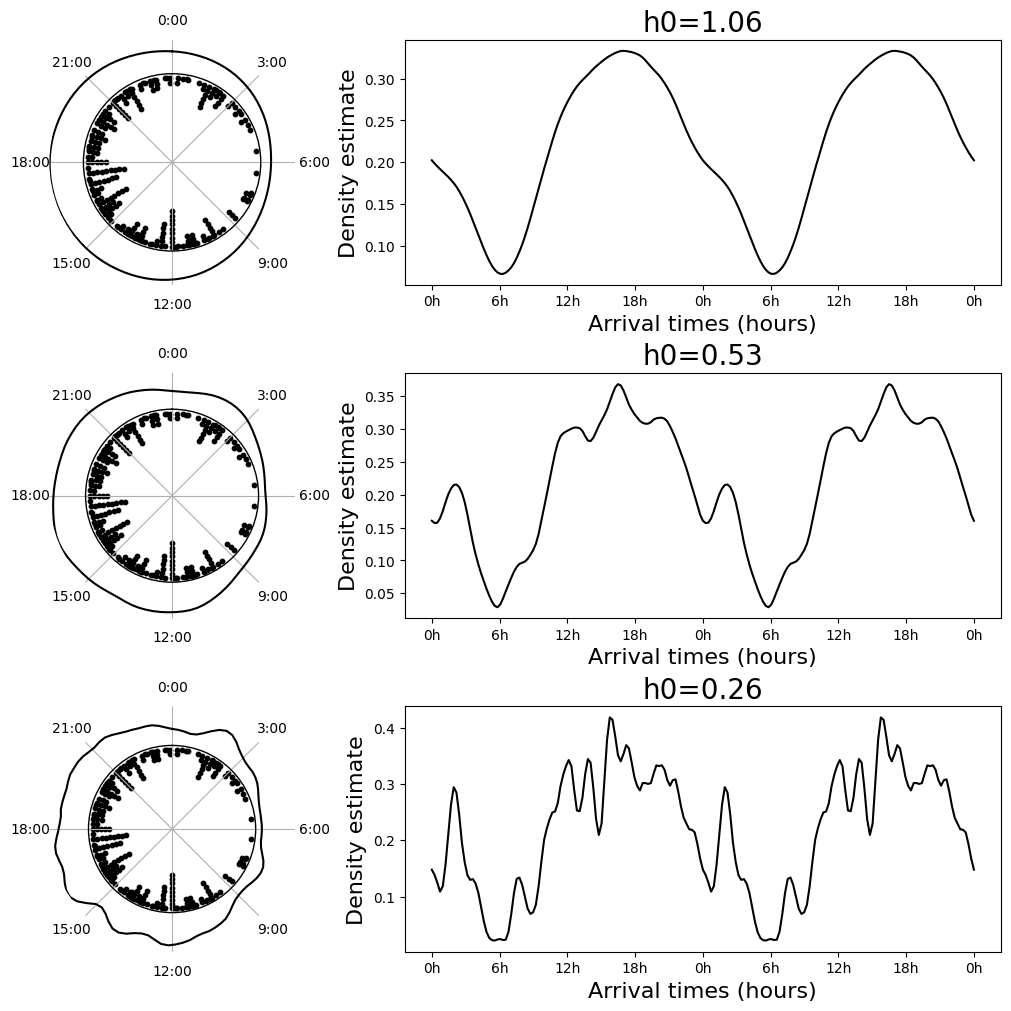

In [8]:
from matplotlib import ticker

mosaic = """
abb
cdd
eff
"""

fig, ax = plt.subplot_mosaic(
    mosaic=mosaic,
    figsize=(10, 10),
    per_subplot_kw={k: {"projection": "polar"} for k in ["a", "c", "e"]},
    layout="constrained",
)

# Fig A: h0 = 1.06
c_fisher_b1.plot(
    ax=ax["a"],
    config={
        "outward": False,
        "rose": False,
        "mean": False,
        "median": False,
        "density": {"method": "nonparametric", "h0": h0},
    }
)

ax["b"].plot(
    np.hstack([c_fisher_b1.density_x, c_fisher_b1.density_x + 2 * np.pi]),
    np.repeat(c_fisher_b1.density_f[:, None], 2, axis=-1).T.flatten(),
    color="black",
)


# Fig B: h0 = 0.53
c_fisher_b1.plot(
    ax=ax["c"],
    config={
        "outward": False,
        "rose": False,
        "mean": False,
        "median": False,
        "density": {"method": "nonparametric", "h0": 0.5 * h0},
    }
)

ax["d"].plot(
    np.hstack([c_fisher_b1.density_x, c_fisher_b1.density_x + 2 * np.pi]),
    np.repeat(c_fisher_b1.density_f[:, None], 2, axis=-1).T.flatten(),
    color="black",
)


# Fig C h0 = 0.26
c_fisher_b1.plot(
    ax=ax["e"],
    config={
        "outward": False,
        "rose": False,
        "mean": False,
        "median": False,
        "density": {"method": "nonparametric", "h0": 0.25 * h0},
    }
)

ax["f"].plot(
    np.hstack([c_fisher_b1.density_x, c_fisher_b1.density_x + 2 * np.pi]),
    np.repeat(c_fisher_b1.density_f[:, None], 2, axis=-1).T.flatten(),
    color="black",
)


h0s = [h0, 0.5 * h0, 0.25 * h0]
position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = np.hstack([position_major, position_major + 2 * np.pi, 4 * np.pi])
labels = [f"{i}h" for i in np.arange(0, c_fisher_b1.full_cycle, 6)]
labels = np.hstack([labels, labels, labels[0]])
for i, scap in enumerate(["b", "d", "f"]):
    ax[scap].xaxis.set_major_locator(ticker.FixedLocator(position_major))
    ax[scap].xaxis.set_major_formatter(ticker.FixedFormatter(labels))
    ax[scap].set_xlabel("Arrival times (hours)", fontsize=16)
    ax[scap].set_ylabel("Density estimate", fontsize=16)
    ax[scap].set_title(f"h0={h0s[i]:.2f}", fontsize=20)

### Figure 4.5

In [9]:
d_fisher_b5 = np.asarray(load_data("B5", source="fisher")["θ"].values)
d_fisher_b5_double = np.hstack([d_fisher_b5, d_fisher_b5 + 180])
# This is an example of an axial data set, which only contains one direction;
# To replicate Fig 2.2, you need to double the data;
c_fisher_b5_double = Circular(d_fisher_b5_double, unit="degree")

/Users/ziweih/Works/pycircstat2/pycircstat2/descriptive.py:524: RuntimeWarning: divide by zero encountered in log
  s = np.sqrt(-2 * np.log(1 - var))  # eq(26.21)


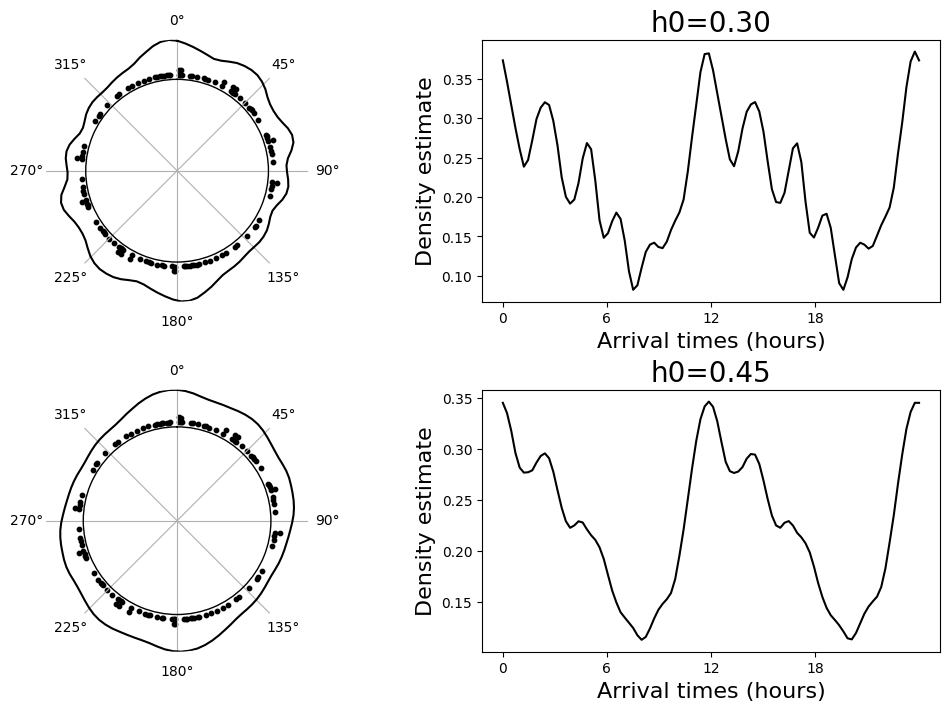

In [10]:
from matplotlib import ticker

mosaic = """
ab
cd
"""

fig, ax = plt.subplot_mosaic(
    mosaic=mosaic,
    figsize=(10, 7),
    per_subplot_kw={k: {"projection": "polar"} for k in ["a", "c"]},
    layout="constrained",
)

h0s = [0.3, 0.45]
# Fig A: h0 = 0.3
c_fisher_b5_double.plot(
    ax=ax["a"],
    config={
        "outward": True,
        "rose": False,
        "mean": False,
        "median": False,
        "density": {"method": "nonparametric", "h0": h0s[0]},
    }    
)

ax["b"].plot(c_fisher_b5_double.density_x, c_fisher_b5_double.density_f, color="black")


# Fig B: h0 = 0.45
c_fisher_b5_double.plot(
    ax=ax["c"],
    config={
        "outward": True,
        "rose": False,
        "mean": False,
        "median": False,
        "density": {"method": "nonparametric", "h0": h0s[1]},
    }    
)

ax["d"].plot(c_fisher_b5_double.density_x, c_fisher_b5_double.density_f, color="black")


position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
# position_major = np.hstack([position_major, position_major + 2 * np.pi, 4 * np.pi])
labels = np.arange(0, c_fisher_b1.full_cycle, 6)
# labels = np.hstack([labels,labels, labels[0]])
for i, s in enumerate(["b", "d"]):
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))
    ax[s].xaxis.set_major_formatter(ticker.FixedFormatter(labels))
    ax[s].set_xlabel("Arrival times (hours)", fontsize=16)
    ax[s].set_ylabel("Density estimate", fontsize=16)
    ax[s].set_title(f"h0={h0s[i]:.2f}", fontsize=20)

In the book, the smoothing values h are 0.5 and 0.75, but it will yield overly smooth density. Only with h=0.3 and 0.45 can we get similar results as the book.

### Figure 4.3 and 4.6

In [11]:
d_fisher_b6 = load_data("B6", source="fisher")
d_fisher_b6_s2 = np.asarray(d_fisher_b6[d_fisher_b6["set"] == 2]["θ"].values)
c_fisher_b6 = Circular(d_fisher_b6_s2, unit="degree")

Text(0, 0.5, 'Symmetrized quantile')

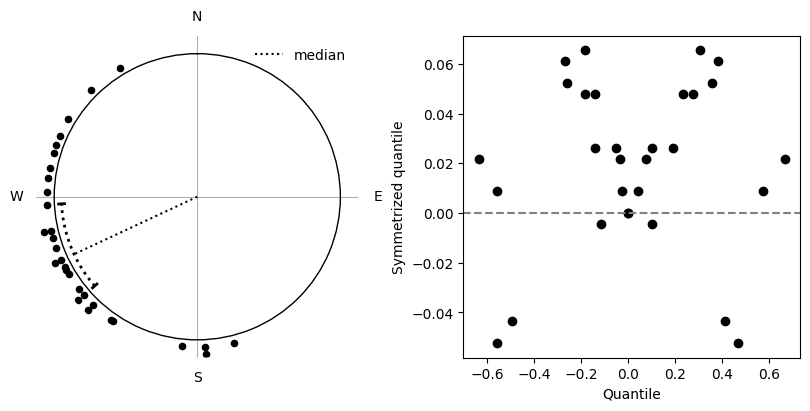

In [12]:
mosaic = """
ab
"""

fig, ax = plt.subplot_mosaic(
    mosaic=mosaic,
    figsize=(8, 4),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)
c_fisher_b6.plot(
    ax=ax["a"],
    config={
        "outward": True,
        "rose": False,
        "mean": False,
        "median": True,
        "scatter": {"size": 20,},
        "density": False,
    }
)

position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
labels = ["N", "E", "S", "W"]
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))
ax["a"].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

z = np.sort(0.5 * (c_fisher_b6.alpha - c_fisher_b6.median))
ax["b"].scatter(np.sin(z), np.sin(0.5 * (z + z[::-1])), color="black")
ax["b"].axhline(0, ls="--", color="gray")
ax["b"].set_xlabel("Quantile")
ax["b"].set_ylabel("Symmetrized quantile")

### Figure 4.7

In [13]:
d_fisher_b5 = np.asarray(load_data("B5", source="fisher")["θ"].values)
c_fisher_b5 = Circular(d_fisher_b5, unit="degree")

In [14]:
n = c_fisher_b5.n
γ = c_fisher_b5.alpha * 2 / 2 / np.pi % (2 * np.pi)  # -> γ = c_fisher_b5.alpha / np.pi
γ_extend = np.hstack([γ[: int(n * 0.2)] + 1, γ, γ[int(n * 0.8) :] - 1])

x = np.array([i / (n + 1) for i in range(1, n + 1)])
x_extend = np.hstack([x[: int(n * 0.2)] + 1, x, x[int(n * 0.8) :] - 1])

Text(0.5, 0, 'Uniform quantiles')

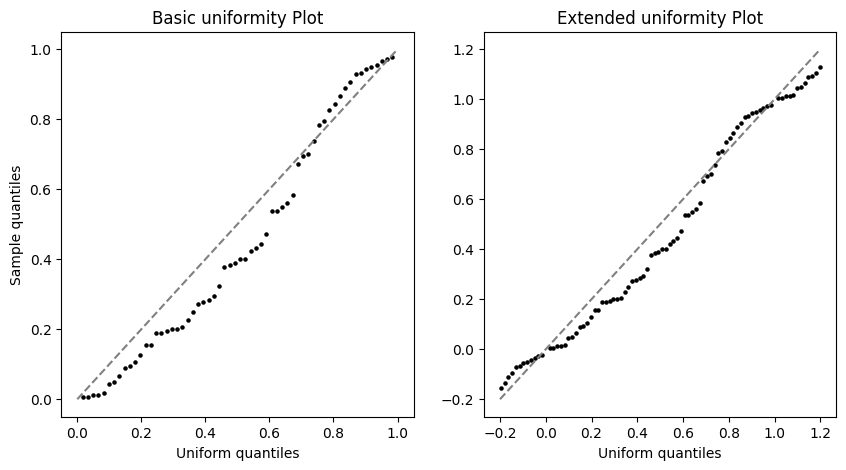

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x, γ, s=5, color="black")
ax[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
ax[0].set_title("Basic uniformity Plot")
ax[0].set_ylabel("Sample quantiles")
ax[0].set_xlabel("Uniform quantiles")


ax[1].scatter(x_extend, γ_extend, s=5, color="black")
ax[1].plot([-0.2, 1.2], [-0.2, 1.2], linestyle="--", color="gray")
ax[1].set_title("Extended uniformity Plot")
ax[1].set_xlabel("Uniform quantiles")

### Figure 4.12 and Table 4.1

In [16]:
d_fisher_b6 = load_data("B6", "fisher")

c_fisher_b6_s0 = Circular(np.sort(d_fisher_b6[d_fisher_b6["set"] == 2]["θ"].values[:10]))
c_fisher_b6_s1 = Circular(
    np.sort(d_fisher_b6[d_fisher_b6.set == 2]["θ"].values[:20]),
    kwargs_median={
        "method": "deviation",
        "average_method": "unique",
    },
)
c_fisher_b6_s2 = Circular(np.sort(d_fisher_b6[d_fisher_b6.set == 2]["θ"].values[:]))

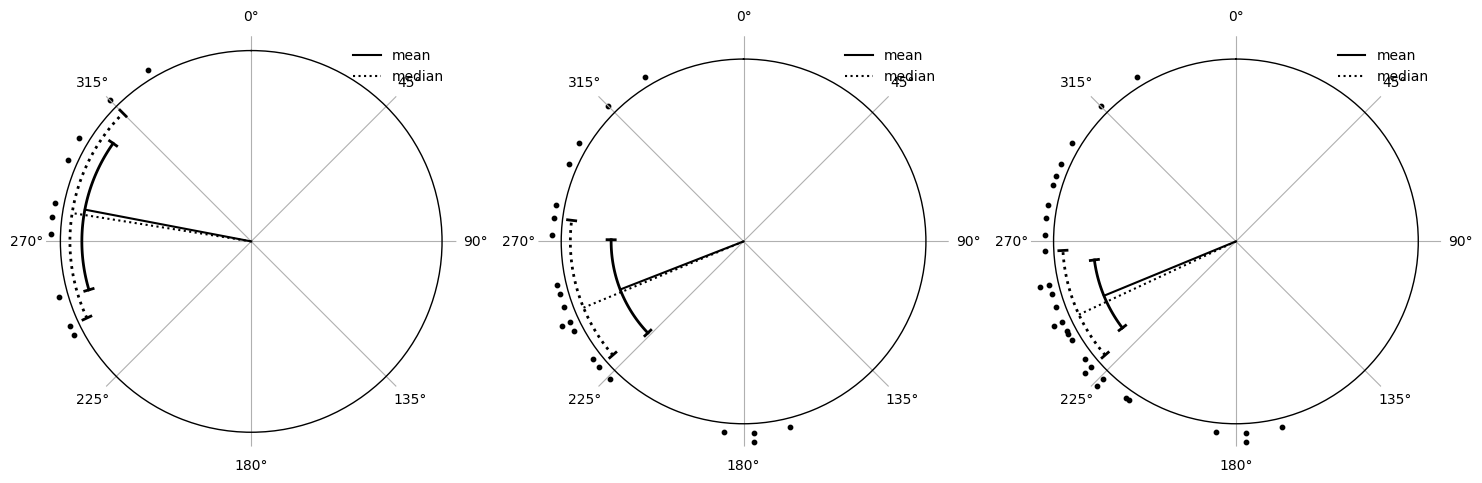

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection="polar"))
c_fisher_b6_s0.plot(
    ax[0],
    config={
        "rose": False,
        "mean": True,
        "median": True,
        "density": False,
    }    
)
c_fisher_b6_s1.plot(
    ax[1],
    config={
        "rose": False,
        "mean": True,
        "median": True,
        "density": False,
    }    
)
c_fisher_b6_s2.plot(
    ax[2],
    config={
        "rose": False,
        "mean": True,
        "median": True,
        "density": False,
    }    
)

In [18]:
from pycircstat2.descriptive import circ_mean_ci

table = {
    "median": [],
    "mean": [],
    "95% median CI": [],
    "95% bootstrap mean CI": [],
    "95% large-sample mean CI": [],
}

for i, c in enumerate([c_fisher_b6_s0, c_fisher_b6_s1, c_fisher_b6_s2]):
    table["mean"].append(np.rad2deg(c.mean).round(1))
    table["median"].append(np.rad2deg(c.median).round(1))
    table["95% median CI"].append(np.rad2deg([c.median_lb, c.median_ub]).round(1))

    if i == 2:
        # CI for mean using dispersion
        table["95% large-sample mean CI"].append(
            np.rad2deg([c.mean_lb, c.mean_ub]).round(1)
        )
        mean_lb, mean_ub = circ_mean_ci(
            alpha=c.alpha,
            B=200,
            method="bootstrap",
        )
        table["95% bootstrap mean CI"].append(np.rad2deg([mean_lb, mean_ub]).round(1))
    else:
        table["95% bootstrap mean CI"].append(
            np.rad2deg([c.mean_lb, c.mean_ub]).round(1)
        )
        table["95% large-sample mean CI"].append("-")

print("Table 4.1 of Fisher (1993), p.78")
print(f"{'Sample size':25} {'10':25} {'20':25} {'30':25}")
print("-" * 100)
for k, v in table.items():
    v10, v20, v30 = v
    print(f"{k:25} {str(v10):25} {str(v20):25} {str(v30):20}")

print(
    "\n* The bootstrap CI is a 95% Highest Density Interval (HDI) based on the bootstrap distribution."
)

Table 4.1 of Fisher (1993), p.78
Sample size               10                        20                        30                       
----------------------------------------------------------------------------------------------------
median                    279.0                     247.5                     245.0               
mean                      280.8                     248.7                     247.6               
95% median CI             [245. 315.]               [229. 277.]               [229. 267.]         
95% bootstrap mean CI     [253.4 305.4]             [226.3 270.7]             [232.  262.2]       
95% large-sample mean CI  -                         -                         [232.7 262.5]       

* The bootstrap CI is a 95% Highest Density Interval (HDI) based on the bootstrap distribution.


### Figure 4.4 and 4.13

In [19]:
d_fisher_b7 = load_data("B7", "fisher")["θ"].values[:]
c_fisher_b7 = Circular(d_fisher_b7)

Text(0, 0.5, 'Sample quantile')

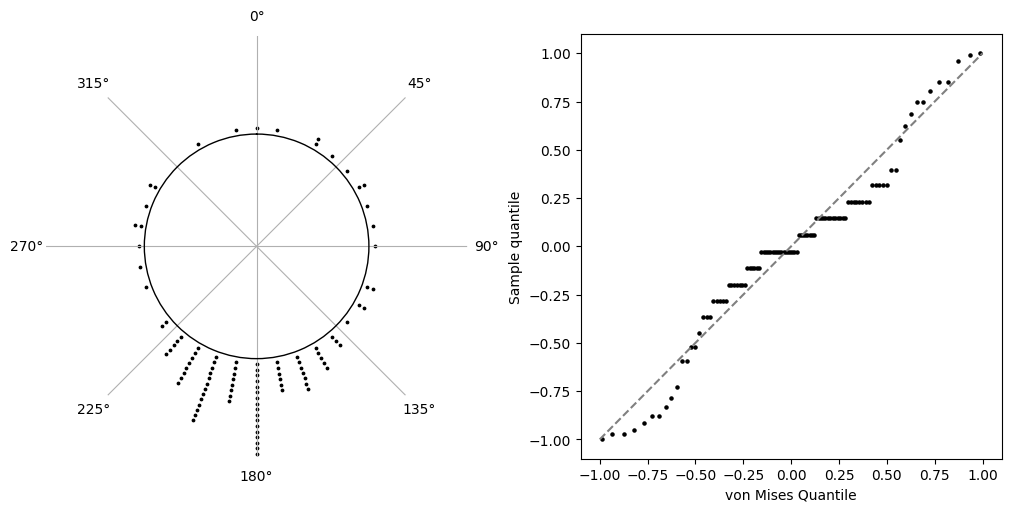

In [20]:
from scipy.stats import probplot

mosaic = """
ab
"""
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic,
    figsize=(10, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

c_fisher_b7.plot(
    ax=ax["a"],
    config={
        "rose": False,
        "mean": False,
        "median": False,
        "density": False,
        "scatter": {"size": 3}
    }    
)

z = np.sort(np.sin(0.5 * (c_fisher_b7.alpha - c_fisher_b7.mean)))
q, z = probplot(z, dist="vonmises", sparams=(c_fisher_b7.kappa))[0]

ax["b"].scatter(np.sin(0.5 * q), z, color="black", s=5)
ax["b"].plot([-1, 1], [-1, 1], ls="--", color="gray")
ax["b"].set_xlabel("von Mises Quantile")
ax["b"].set_ylabel("Sample quantile")

In [21]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-10-17 12:30:11CEST

Python implementation: CPython
Python version       : 3.12.11
IPython version      : 9.5.0

pycircstat2: 0.1.15
scipy      : 1.16.2
matplotlib : 3.10.6
numpy      : 2.3.3

Watermark: 2.5.0

